# Week13b

### MNIST CNN 실습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 2)         52        
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 2)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               1

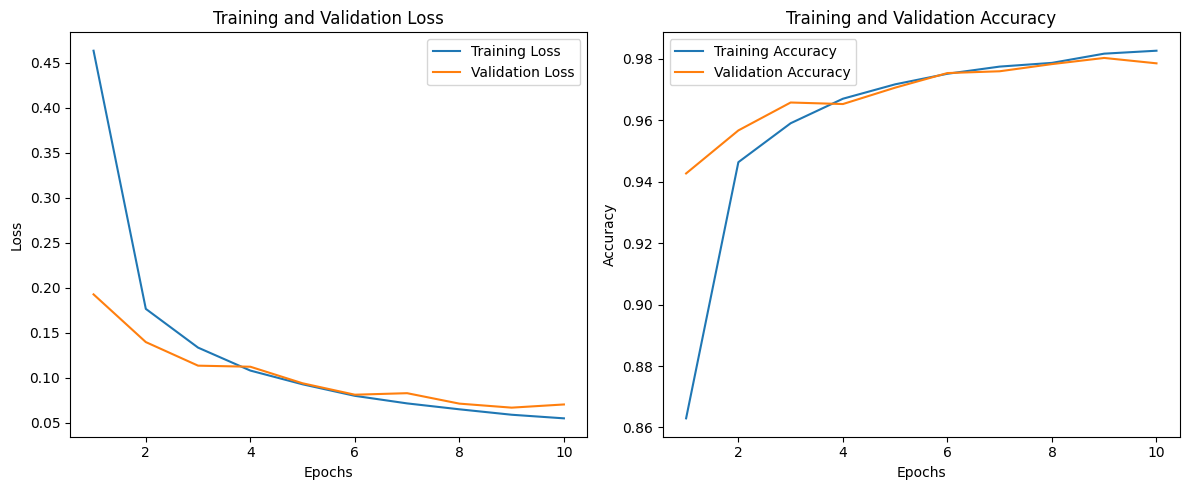

In [4]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# one-hot encoder
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential()
# first Convolutional Layer + MaxPooling
model.add(layers.Conv2D(2, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
# second Convolutional Layer + MaxPooling
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
# flatten Layer
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print (f"Test Accuracy: {test_acc}")

import matplotlib.pyplot as plt
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### IMDB Conv 1D

Epoch 1/8
157/157 [==============================] - 25s 154ms/step - loss: 0.5802 - acc: 0.7042 - val_loss: 0.4408 - val_acc: 0.8124
Epoch 2/8
157/157 [==============================] - 23s 149ms/step - loss: 0.3644 - acc: 0.8575 - val_loss: 0.4337 - val_acc: 0.8560
Epoch 3/8
157/157 [==============================] - 26s 168ms/step - loss: 0.2575 - acc: 0.9118 - val_loss: 0.4161 - val_acc: 0.8712
Epoch 4/8
157/157 [==============================] - 29s 185ms/step - loss: 0.1848 - acc: 0.9481 - val_loss: 0.4652 - val_acc: 0.8818
Epoch 5/8
157/157 [==============================] - 27s 172ms/step - loss: 0.1283 - acc: 0.9759 - val_loss: 0.5172 - val_acc: 0.8804
Epoch 6/8
157/157 [==============================] - 26s 163ms/step - loss: 0.0881 - acc: 0.9900 - val_loss: 0.6791 - val_acc: 0.8726
Epoch 7/8
157/157 [==============================] - 25s 161ms/step - loss: 0.0635 - acc: 0.9960 - val_loss: 0.6232 - val_acc: 0.8812
Epoch 8/8
157/157 [==============================] - 24s 152ms

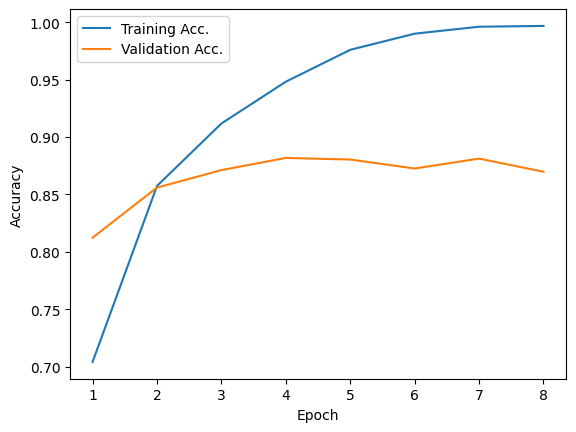

In [8]:
##############코드를 작성하세요

from keras.datasets import imdb 
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

# consider only top 10,000 common words
(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words=10000)
# check labels and counts for neg and positive
np.unique(y_train,return_counts=True)
# cut off reviews after 500 words
x_train_500 = sequence.pad_sequences(x_train,maxlen=500)
x_test_500 = sequence.pad_sequences(x_test,maxlen=500)

model = Sequential()
# embedding layer
model.add(layers.Embedding(input_dim=10000,
                           output_dim=128,
                           input_length=500))
# Conv 1D( and Maxpooling1D layer
model.add(layers.Conv1D(filters=32,
                        kernel_size=7,
                        activation='relu'))
model.add(layers.MaxPooling1D(pool_size=5))

model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

epoch_num = 8
history = model.fit(x = x_train_500,
                    y = y_train,
                    epochs = epoch_num, 
                    batch_size = 128, 
                    validation_split = 0.2)

########코드를 작성하세요

import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(epoch_num)],
         history.history['acc'],
         label = "Training Acc.")
plt.plot([i+1 for i in range(epoch_num)],
         history.history['val_acc'],
         label = "Validation Acc.")
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()
plt.show()

### IMDB Conv 1D + LSTM

Epoch 1/8
157/157 [==============================] - 80s 468ms/step - loss: 0.6353 - acc: 0.6873 - val_loss: 0.4253 - val_acc: 0.8256
Epoch 2/8
157/157 [==============================] - 72s 457ms/step - loss: 0.4288 - acc: 0.8439 - val_loss: 0.4760 - val_acc: 0.8580
Epoch 3/8
157/157 [==============================] - 79s 504ms/step - loss: 0.4029 - acc: 0.8609 - val_loss: 0.3988 - val_acc: 0.8690
Epoch 4/8
157/157 [==============================] - 85s 541ms/step - loss: 0.3644 - acc: 0.8817 - val_loss: 0.4068 - val_acc: 0.8754
Epoch 5/8
157/157 [==============================] - 90s 575ms/step - loss: 0.3079 - acc: 0.9071 - val_loss: 0.4734 - val_acc: 0.8840
Epoch 6/8
157/157 [==============================] - 75s 476ms/step - loss: 0.2874 - acc: 0.9176 - val_loss: 0.4924 - val_acc: 0.8814
Epoch 7/8
157/157 [==============================] - 75s 479ms/step - loss: 0.2687 - acc: 0.9281 - val_loss: 0.4600 - val_acc: 0.8768
Epoch 8/8
157/157 [==============================] - 77s 488ms

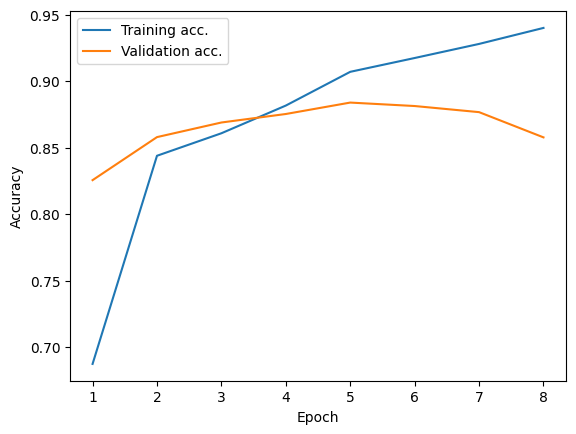

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# consider only top 10,000 common words
(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words=10000)
# check labels and counts for neg and positive
np.unique(y_train,return_counts=True)
# cut off reviews after 500 words
x_train_500 = sequence.pad_sequences(x_train,maxlen=500)
x_test_500 = sequence.pad_sequences(x_test,maxlen=500)

##############코드를 작성하세요

model = Sequential()
# embedding layer
model.add(layers.Embedding(input_dim=10000,
                           output_dim = 128,
                           input_length=500))
#conv1D and MaxPooling1D layer
model.add(layers.Conv1D (filters=32,
                         kernel_size=7, 
                         activation='relu'))
model.add(layers.MaxPooling1D(pool_size=5))
model.add(layers.LSTM(units = 32,
                      dropout=0.2,
                      recurrent_dropout=0.5,
                      return_sequences=True))
model.add(layers.LSTM(units = 64,
                      dropout = 0.1,
                      recurrent_dropout=0.2))
model.add(layers.Dense(1))
model.compile(optimizer = RMSprop(),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
epoch_num= 8
history = model.fit(x=x_train_500, 
                    y=y_train, 
                    epochs=epoch_num,
                    batch_size=128,
                    validation_split=0.2)

########코드를 작성하세요

plt.plot([i+1 for i in range(epoch_num)],
         history.history['acc'],
         label = 'Training acc.')
plt.plot([i+1 for i in range(epoch_num)],
         history.history['val_acc'],
         label='Validation acc.')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

### 오토인코더

In [ ]:

from keras import layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt

##############코드를 작성하세요

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
encoder = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation= 'relu', padding='same'),
    layers.MaxPooling2D ( (2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
])

decoder = models.Sequential([
    layers.Conv2DTranspose(16, (3, 3), activation= 'relu', padding='same', strides=(2, 2)), 
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2)), 
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

autoencoder = models. Sequential ([encoder, decoder])
autoencoder.compile(optimizer=' adam', loss='mse', metrics=['acc'])
autoencoder.fit(x_train, x_train, epochs=10, batch_size=16,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs)

########코드를 작성하세요

def plot_images(original, decoded, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.axis('off')
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded[i])
        plt.axis('off')

plot_images(x_test, decoded_imgs)

print(encoder.summary())
print(decoder.summary())
print(encoded_imgs.shape)
print(decoded_imgs.shape)